<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-SPS-parameter-estimates-(esp.-stellar-masses)" data-toc-modified-id="Compare-SPS-parameter-estimates-(esp.-stellar-masses)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare SPS parameter estimates (esp. stellar masses)</a></span></li><li><span><a href="#ZFourGE-catalogs" data-toc-modified-id="ZFourGE-catalogs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ZFourGE catalogs</a></span><ul class="toc-item"><li><span><a href="#&quot;NMF&quot;-templates" data-toc-modified-id="&quot;NMF&quot;-templates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>"NMF" templates</a></span></li><li><span><a href="#SFH-templates" data-toc-modified-id="SFH-templates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SFH templates</a></span></li><li><span><a href="#ZFOURGE-FAST" data-toc-modified-id="ZFOURGE-FAST-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ZFOURGE FAST</a></span></li></ul></li><li><span><a href="#SPS-parameters" data-toc-modified-id="SPS-parameters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SPS parameters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#vnorm_orig" data-toc-modified-id="vnorm_orig-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>vnorm_orig</a></span></li><li><span><a href="#vnorm_new" data-toc-modified-id="vnorm_new-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>vnorm_new</a></span></li><li><span><a href="#units" data-toc-modified-id="units-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>units</a></span></li></ul></li><li><span><a href="#Consistent-results" data-toc-modified-id="Consistent-results-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Consistent results</a></span></li><li><span><a href="#Direct-comparison-NMF(orig)---SFH(units)" data-toc-modified-id="Direct-comparison-NMF(orig)---SFH(units)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Direct comparison NMF(orig) - SFH(units)</a></span></li><li><span><a href="#A-problem" data-toc-modified-id="A-problem-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A problem</a></span><ul class="toc-item"><li><span><a href="#Mass-offset-is-largely-driven-by-the-templates-with-the-highest-M/Lv" data-toc-modified-id="Mass-offset-is-largely-driven-by-the-templates-with-the-highest-M/Lv-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Mass offset is largely driven by the templates with the highest M/Lv</a></span></li></ul></li><li><span><a href="#&quot;New&quot;-and-&quot;units&quot;-should-agree" data-toc-modified-id="&quot;New&quot;-and-&quot;units&quot;-should-agree-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>"New" and "units" should agree</a></span></li><li><span><a href="#Are-the-template-flux-units-correct?" data-toc-modified-id="Are-the-template-flux-units-correct?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Are the template flux units correct?</a></span></li><li><span><a href="#standard_output-wrapper-function" data-toc-modified-id="standard_output-wrapper-function-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>standard_output wrapper function</a></span></li><li><span><a href="#SFRs" data-toc-modified-id="SFRs-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>SFRs</a></span><ul class="toc-item"><li><span><a href="#Inferred-observed-frame-MIR/FIR-fluxes" data-toc-modified-id="Inferred-observed-frame-MIR/FIR-fluxes-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Inferred observed-frame MIR/FIR fluxes</a></span></li><li><span><a href="#SFR-,-eazy-vs.-UV+IR" data-toc-modified-id="SFR-,-eazy-vs.-UV+IR-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>SFR , eazy vs. UV+IR</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Compare SPS parameter estimates (esp. stellar masses)

With change [b191c147](https://github.com/gbrammer/eazy-py/blob/b191c147c3e456e9bea7a95d83f8491f1eab0522/eazy/photoz.py) committed on 13 Aug 2020 I implemented an algorithm to compute the SPS parameters in `eazy.photoz.PhotoZ.sps_parameters` using the cgs units of the catalog photometry (e.g., µJy) and templates (`L_sun./A` for FSPS models).  The previous commit was [f1bc300](https://github.com/gbrammer/eazy-py/blob/f1bc3001dc8e535b48d7315e5cf4d9082ec6d023/eazy/photoz.py) and a diff of the two is [here](https://github.com/gbrammer/eazy-py/compare/b191c14..f1bc300).  This was designed to be used with a new version of the templates that were each themselves individual FSPS models with explicit SFH, dust, Z, etc. parameters, as opposed to the "NMF" linear combination templates that had been developed earlier.

The NMF templates should themselves have the appropriate flux density units, so the new algorithm should work with them as well.  However, it was pointed out to me that in fact stellar masses computed with the code before and after this change did not agree well, with large scatter and systematic offsets. 

This notebook runs the different combinations of templates and SPS parameters to try to investigate these differences.



In [1]:
import os
os.chdir('/Users/gbrammer/Research/Catalogs/ZFOURGE/TemplateMassTest')

In [2]:
from IPython.display import Image, display, HTML

import eazy
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.table import Table

import os

import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs()
    
print('Eazy version: ', eazy.__version__)

Eazy version:  0.4.dev130


# ZFourGE catalogs

Download, e.g., the `cdfs` catalogs from https://zfourge.tamu.edu/data/.

In [3]:
# field = 'uds'
# field = 'cosmos'
field = 'cdfs'

In [4]:
params = {}

if field == 'uds':
    params['CATALOG_FILE'] = 'uds/uds.v1.5.8.cat'
    params['MAIN_OUTPUT_FILE'] = 'zfourge.uds'
    params['MW_EBV'] = 0.0227
    translate_file = 'uds/eazy/uds.v1.5.8.translate'
    params['PRIOR_FILTER'] = 33 # K
    
elif field == 'cdfs':
    params['CATALOG_FILE'] = 'cdfs/cdfs.v1.6.11.cat'
    params['MAIN_OUTPUT_FILE'] = 'zfourge.cdfs'
    params['MW_EBV'] = 0.00852
    translate_file = 'cdfs/eazy/cdfs.v1.6.9.translate'
    params['PRIOR_FILTER'] = 33 # K

elif field == 'cosmos':
    params['CATALOG_FILE'] = 'cosmos/cosmos.v1.3.8.cat'
    params['MAIN_OUTPUT_FILE'] = 'zfourge.cosmos'
    params['MW_EBV'] = 0.01889
    translate_file = 'cosmos/eazy/cosmos.v1.3.6.translate'
    params['PRIOR_FILTER'] = 33 # K

params['Z_STEP'] = 0.005
params['Z_MIN'] = 0.01
params['Z_MAX'] = 6. # For testing

params['PRIOR_ABZP'] = 25 
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMP_ERR_FILE'] = 'templates/template_error_cosmos2020.txt'
params['TEMP_ERR_A2'] = 1.

params['FILTERS_RES'] = 'FILTER.RES.latest'

#params['TEMPLATES_FILE'] = 'templates/spline_templates_v3/grid.param'

params['IGM_SCALE_TAU'] = 0.8

zpfile = '{0}.zphot.zeropoint'.format(params['MAIN_OUTPUT_FILE'])
if not os.path.exists(zpfile):
    zpfile = None



## "NMF" templates

Final templates are linear combinations of a set of 560 basis FSPS models with different `tau`, `tage`, `Av`, ...

In [5]:
#params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['TEMPLATES_FILE'] = 'templates/fsps_full/fsps_QSF_12_v3.param'
nmf = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, 
                              zeropoint_file=zpfile, params=params, load_prior=True, load_products=False)

Read default param file: /Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: cdfs/cdfs.v1.6.11.cat
   >>> NOBJ = 30911
f_IRAC_80 e_IRAC_80 ( 21): IRAC/irac_tr4_2004-08-09.dat
f_IRAC_58 e_IRAC_58 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC_45 e_IRAC_45 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC_36 e_IRAC_36 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_Ks e_Ks (255): FOURSTAR/Ks_cam_optics_sky.txt
f_KsHI e_KsHI (269): VLT/hawki_k_ETC.dat
f_J1 e_J1 (249): FOURSTAR/J1_cam_optics_sky.txt
f_J2 e_J2 (250): FOURSTAR/J2_cam_optics_sky.txt
f_J3 e_J3 (251): FOURSTAR/J3_cam_optics_sky.txt
f_Hs e_Hs (254): FOURSTAR/Hshort_cam_optics_sky.txt
f_Hl e_Hl (253): FOURSTAR/Hlong_cam_optics_sky.txt
f_U e_U (103): ESO/vimos_u.res
f_B e_B (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_V e_V (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_I e_I (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_Z e_Z (  7): hst/ACS_update_s

100%|██████████| 12/12 [00:07<00:00,  1.66it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 7.355 s


388it [00:06, 59.99it/s]


In [6]:
params['TEMPLATES_FILE'] = 'templates/fsps_full_2021/fsps_QSF_12_v3_narrow.param'
nmf2 = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, 
                              zeropoint_file=zpfile, params=params, load_prior=True, load_products=False)

Read default param file: /Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: cdfs/cdfs.v1.6.11.cat
   >>> NOBJ = 30911
f_IRAC_80 e_IRAC_80 ( 21): IRAC/irac_tr4_2004-08-09.dat
f_IRAC_58 e_IRAC_58 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC_45 e_IRAC_45 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC_36 e_IRAC_36 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_Ks e_Ks (255): FOURSTAR/Ks_cam_optics_sky.txt
f_KsHI e_KsHI (269): VLT/hawki_k_ETC.dat
f_J1 e_J1 (249): FOURSTAR/J1_cam_optics_sky.txt
f_J2 e_J2 (250): FOURSTAR/J2_cam_optics_sky.txt
f_J3 e_J3 (251): FOURSTAR/J3_cam_optics_sky.txt
f_Hs e_Hs (254): FOURSTAR/Hshort_cam_optics_sky.txt
f_Hl e_Hl (253): FOURSTAR/Hlong_cam_optics_sky.txt
f_U e_U (103): ESO/vimos_u.res
f_B e_B (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_V e_V (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_I e_I (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_Z e_Z (  7): hst/ACS_update_s

100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Template   0: fsps_QSF_12_v3_narrow_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_narrow_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_narrow_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_narrow_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_narrow_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_narrow_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_narrow_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_narrow_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_narrow_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_narrow_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_narrow_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_narrow_012.dat (NZ=1).
Process templates: 11.741 s


388it [00:06, 55.80it/s]


## SFH templates

Individual templates are FSPS models with a specific SFH, Av, Z, etc..  They are also evolve with redshift.

In [7]:
params['TEMPLATES_FILE'] = 'templates/spline_templates_v3/c2020_spline.param'
sfh = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, 
                              zeropoint_file=zpfile, params=params, load_prior=True, load_products=False)

Read default param file: /Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: cdfs/cdfs.v1.6.11.cat
   >>> NOBJ = 30911
f_IRAC_80 e_IRAC_80 ( 21): IRAC/irac_tr4_2004-08-09.dat
f_IRAC_58 e_IRAC_58 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC_45 e_IRAC_45 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC_36 e_IRAC_36 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_Ks e_Ks (255): FOURSTAR/Ks_cam_optics_sky.txt
f_KsHI e_KsHI (269): VLT/hawki_k_ETC.dat
f_J1 e_J1 (249): FOURSTAR/J1_cam_optics_sky.txt
f_J2 e_J2 (250): FOURSTAR/J2_cam_optics_sky.txt
f_J3 e_J3 (251): FOURSTAR/J3_cam_optics_sky.txt
f_Hs e_Hs (254): FOURSTAR/Hshort_cam_optics_sky.txt
f_Hl e_Hl (253): FOURSTAR/Hlong_cam_optics_sky.txt
f_U e_U (103): ESO/vimos_u.res
f_B e_B (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_V e_V (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_I e_I (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_Z e_Z (  7): hst/ACS_update_s

100%|██████████| 17/17 [00:15<00:00,  1.08it/s]


Template   0: fsps_alpha_bin0_Av0.0.fits (NZ=14).
Template   1: fsps_alpha_bin0_Av0.5.fits (NZ=14).
Template   2: fsps_alpha_bin1_Av0.0.fits (NZ=14).
Template   3: fsps_alpha_bin1_Av0.5.fits (NZ=14).
Template   4: fsps_alpha_bin1_Av1.0.fits (NZ=14).
Template   5: fsps_alpha_bin1_Av2.0.fits (NZ=14).
Template   6: fsps_alpha_bin1_Av3.0.fits (NZ=14).
Template   7: spline_age0.31_av0.0.fits (NZ=14).
Template   8: spline_age0.31_av1.0.fits (NZ=14).
Template   9: spline_age0.31_av2.0.fits (NZ=14).
Template  10: spline_age0.62_av0.0.fits (NZ=14).
Template  11: spline_age0.62_av1.0.fits (NZ=14).
Template  12: spline_age0.62_av2.5.fits (NZ=14).
Template  13: spline_age1.76_av0.0.fits (NZ=14).
Template  14: spline_age1.76_av1.0.fits (NZ=14).
Template  15: spline_age7.18_av0.0.fits (NZ=14).
Template  16: spline_age0.91_av0.0.fits (NZ=14).
Process templates: 15.874 s


388it [00:06, 56.08it/s]


## ZFOURGE FAST

Fit at same redshifts used for the ZFOURGE FAST run

In [8]:
import glob
fout_file = glob.glob(f'{field}/*fout')[0]
fout = Table.read(fout_file, format='ascii.commented_header')
print(len(fout), nmf.NOBJ)

30911 30911


In [9]:
#Fit templates
nmf.fit_at_zbest(zbest=fout['z'], get_err=True)
sfh.fit_at_zbest(zbest=fout['z'], get_err=True)

/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)


fit_best: 9.3 s (n_proc=3,  NOBJ=30778)


/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)
/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)
/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)


fit_best: 11.2 s (n_proc=3,  NOBJ=30778)


# SPS parameters

### vnorm_orig

`vnorm_orig` is what I think is the **incorrect** way of doing the coefficient / parameter normalizations.  This is implemented with ``sps_parameters(vnorm_type=1)`` in [eazy-0.4.dev130](https://github.com/gbrammer/eazy-py/commit/8fdfcce528d2b3929b899869e187b359f5802c25).

   - `coeffs_norm`: coefficients renormalized to template rest-frame V-band
   - `tab`: table of parameters associated with the templates
   - `Lv`: V-band luminosity derived from the rest-frame V flux inferred from the photometry
   
   ```
   Lv_norm = (coeffs_norm * tab['Lv']).sum()
   mass_norm = (coeffs_norm * tab['mass']).sum()
   mass = (mass_norm / Lv_norm) * Lv
   ``` 

### vnorm_new

`vnorm_new` is what I think is the **correct** way, where the parameter values like mass are nomalized by the 
tabulated `Lv` of the template because the fit coefficients have also been normalized to the V-band.  This is implemented with ``sps_parameters(vnorm_type=2)`` in [eazy-0.4.dev130](https://github.com/gbrammer/eazy-py/commit/8fdfcce528d2b3929b899869e187b359f5802c25).

The original idea of these V-band normalized parameters was to make the results independent of the absolute flux scale of the templates themselves.  Imagine scaling both `mass` and `Lv` for a single template in the parameter table `tab` by some factor µ, such that the associated `M/Lv` is unchanged.  The inferred mass for the `orig` method *will* change, however! 

   - `coeffs_norm`: coefficients renormalized to template rest-frame V-band
   - `tab`: table of parameters associated with the templates
   - `Lv`: V-band luminosity derived from the rest-frame V flux inferred from the photometry
   
   ```
   mass_norm = (coeffs_norm * tab['mass'] / tab['Lv']).sum()`
   mass = (mass_norm / Lv_norm) * Lv
   ``` 

### units

`units` is fully separate algorithm that makes use of the fact that the FSPS templates have explicit flux density units of `L_sun / Angstrom`.  Therefore, knowing the units of the photometry indicated by the `PRIOR_ABZP` parameter, the **raw** template normalization coefficients can be turned into an absolute scaling of the templataes at a given redshift, which is then just multiplied to the tagged template stellar mass (and LIR, SFR, etc.).

   - `coeffs_rest`: fit coefficients rescaled such that they are the absolute scaling of the input templates in units of L_sun / A to the cgs units of the photometry
   - `tab`: table of parameters associated with the templates

   ```
   Lv = (coeffs_rest * tab['Lv']).sum()
   mass = (coeffs_rest * tab['mass').sum()
   ```

Note that now `Lv` comes fom the tabulated value the total coefficients, and not from the rest-frame V-band flux inferred separately from the photometry.

In [10]:
nmf_vnorm_orig = nmf.sps_parameters(simple=True, extra_rf_filters=[], template_fnu_units=None, vnorm_type=1)
nmf_vnorm_new = nmf.sps_parameters(simple=True, extra_rf_filters=[], template_fnu_units=None, vnorm_type=2)
nmf_units = nmf.sps_parameters(simple=True, extra_rf_filters=[])

sfh_vnorm_orig = sfh.sps_parameters(simple=True, extra_rf_filters=[], template_fnu_units=None, vnorm_type=1)
sfh_vnorm_new = sfh.sps_parameters(simple=True, extra_rf_filters=[], template_fnu_units=None, vnorm_type=2)
sfh_units = sfh.sps_parameters(simple=True, extra_rf_filters=[])


In [11]:
nmf_vnorm_orig.meta['label'] = 'NMF orig'
nmf_vnorm_new.meta['label'] = 'NMF new'
nmf_units.meta['label'] = 'NMF units'

sfh_vnorm_orig.meta['label'] = 'SFH orig'
sfh_vnorm_new.meta['label'] = 'SFH new'
sfh_units.meta['label'] = 'SFH units'

In [12]:
# Catalog subset
subset = (fout['z'] > 0.2) & (fout['z'] < 4) & (nmf.cat['use'] == 1)
subset.sum(), len(subset)

(12682, 30911)

## Consistent results

`NMF_orig` and `SFH_units` both agree pretty well with the FAST outputs.  The systematic overestimate w.r.t. FAST likely results from differences between the underlying SPS models (`bc03` vs `FSPS`). Both should be Chabrier IMF.

In [13]:
ylim = (-1.2, 1.2)
fs = (8,4)

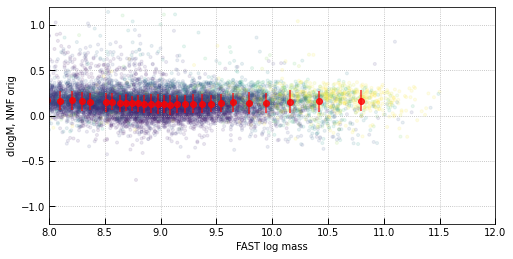

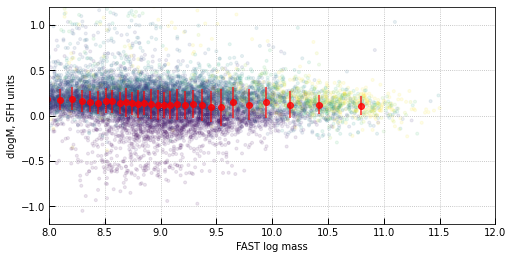

In [14]:
for tab in [nmf_vnorm_orig, sfh_units]:
    fig, ax = plt.subplots(1,1,figsize=fs)
    
    # Color-coding is M/Lv
    ax.scatter(fout['lmass'][subset], (np.log10(tab['mass']) - fout['lmass'])[subset], 
               c=(tab['mass']/tab['Lv'])[subset], vmin=0, vmax=2, alpha=0.1)
    
    xm, ym, ys, yn = eazy.utils.running_median(fout['lmass'][subset], 
                                               (np.log10(tab['mass']) - fout['lmass'])[subset],
                                               NBIN=32)
    
    ax.errorbar(xm, ym, ys, marker='o', linestyle='None', color='r', alpha=0.8)
    
    ax.set_xlim(8,12)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_xlabel('FAST log mass')
    ax.set_ylabel(f"dlogM, {tab.meta['label']}")
    

## Direct comparison NMF(orig) - SFH(units)

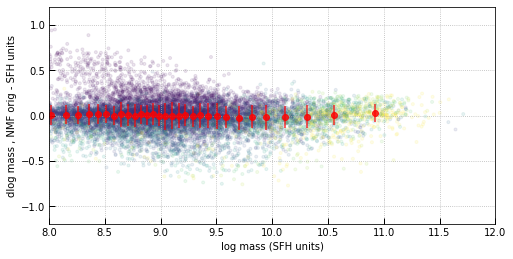

In [15]:
# Color-coding is M/Lv
param = 'mass'
for param in ['mass']:
    for comp in [sfh_units]:

        fig, ax = plt.subplots(1,1,figsize=fs)

        ax.scatter(np.log10(sfh_units[param])[subset], np.log10(nmf_vnorm_orig[param]/comp[param])[subset], 
                   c=(sfh_units['mass']/sfh_units['Lv'])[subset], vmin=0, vmax=2, alpha=0.1)

        xm, ym, ys, yn = eazy.utils.running_median(np.log10(sfh_units[param])[subset], 
                                                   np.log10(nmf_vnorm_orig[param]/comp[param])[subset],
                                                   NBIN=32)

        ax.errorbar(xm, ym, ys, marker='o', linestyle='None', color='r', alpha=0.8)

        if param == 'mass':
            ax.set_xlim(8,12)
        elif param == 'sfr':
            ax.set_xlim(-2,4)

        ax.set_ylim(ylim)
        ax.grid()
        ax.set_xlabel(f"log {param} ({tab.meta['label']})")
        ax.set_ylabel(f"dlog {param} , {nmf_vnorm_orig.meta['label']} - {comp.meta['label']}")


## A problem

But `NMF orig` shouldn't work because the parameters / coefficients are incorrectly normalized!  

Below is the mass comparison for `NMF units`, which shows large scatter and with masses systematically higher. 

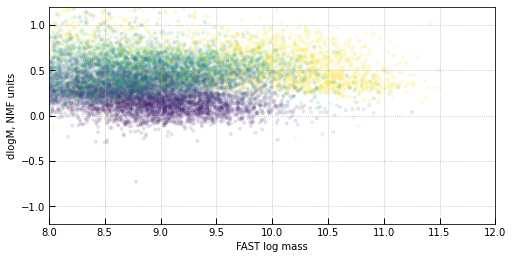

In [16]:
for tab in [nmf_units]:
    fig, ax = plt.subplots(1,1,figsize=fs)
    ax.scatter(fout['lmass'][subset], (np.log10(tab['mass']) - fout['lmass'])[subset], 
               c=(tab['mass']/tab['Lv'])[subset], vmin=0, vmax=2, alpha=0.1)
    
    ax.set_xlim(8,12)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_xlabel('FAST log mass')
    ax.set_ylabel(f"dlogM, {tab.meta['label']}")
    

### Mass offset is largely driven by the templates with the highest M/Lv

SFR doesn't show such large differences because the high M/Lv template doesn't contribute much SF.

In [52]:
template_params_file = nmf.param['TEMPLATES_FILE']+'.fits'
if os.path.exists(template_params_file):
    tab_temp = Table.read(template_params_file)

tab_temp['MLv'] = tab_temp['mass']/tab_temp['Lv']
tab_temp['sfrv'] = tab_temp['sfr']/tab_temp['Lv']/1.e-9
for c in ['Av','Lv','mass','MLv','sfrv']:
    tab_temp[c].format = '.3f'

import pandas as pd
df = tab_temp['Av','Lv','mass','MLv','sfrv'].to_pandas()

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.apply(highlight_max, subset='MLv')

,Av,Lv,mass,MLv,sfrv
0,0.059852,2.039801,0.791941,0.388244,0.003030
1,0.110747,1.485875,1.115575,0.750786,0.001946
2,0.129534,1.027287,1.663337,1.619154,0.001398
3,0.121472,0.718784,2.601326,3.619067,0.000742
4,0.718310,0.496297,2.919393,5.882349,0.003644
5,2.884892,0.131747,5.340482,40.535774,0.009944
6,0.068966,2.458092,0.300899,0.122411,0.525837
7,0.272697,1.891361,0.393632,0.208121,0.479606
8,0.790058,1.275120,0.406328,0.318659,1.107408
9,1.353145,0.850516,0.520398,0.611861,1.700440


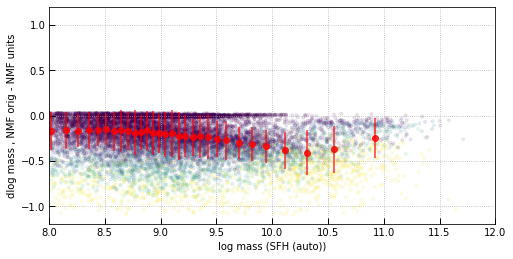

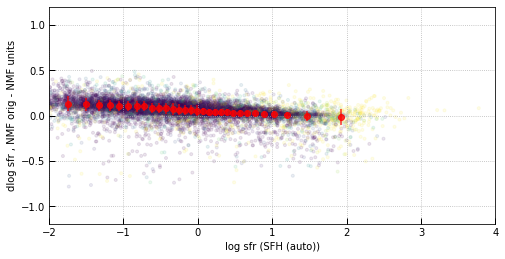

In [37]:
iz = nmf.izbest
# Normalize by template V
coeffs_norm = nmf.coeffs_best*nmf.ubvj_tempfilt[iz,:,2]        
# Normalize fit coefficients to unity sum
coeffs_norm = (coeffs_norm.T/coeffs_norm.sum(axis=1)).T

param = 'mass'
for param in ['mass','sfr']:
    for comp in [nmf_units]:

        fig, ax = plt.subplots(1,1,figsize=fs)
        
        # Color-code by v-band contribution of extreme M/L dusty template
        ax.scatter(np.log10(sfh_units[param])[subset], np.log10(nmf_vnorm_orig[param]/comp[param])[subset], 
                   c=coeffs_norm[:,5][subset], vmin=0, vmax=0.05, alpha=0.1)

        xm, ym, ys, yn = eazy.utils.running_median(np.log10(sfh_units[param])[subset], 
                                                   np.log10(nmf_vnorm_orig[param]/comp[param])[subset],
                                                   NBIN=32)

        ax.errorbar(xm, ym, ys, marker='o', linestyle='None', color='r', alpha=0.8)

        if param == 'mass':
            ax.set_xlim(8,12)
        elif param == 'sfr':
            ax.set_xlim(-2,4)

        ax.set_ylim(ylim)
        ax.grid()
        ax.set_xlabel(f"log {param} ({tab.meta['label']})")
        ax.set_ylabel(f"dlog {param} , {nmf_vnorm_orig.meta['label']} - {comp.meta['label']}")


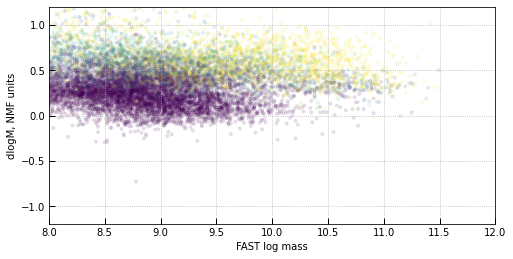

In [39]:
for tab in [nmf_units]:
    fig, ax = plt.subplots(1,1,figsize=fs)
    ax.scatter(fout['lmass'][subset], (np.log10(tab['mass']) - fout['lmass'])[subset], 
               c=coeffs_norm[:,4:6][subset].sum(axis=1), vmin=0, vmax=0.05, alpha=0.1)
    
    ax.set_xlim(8,12)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_xlabel('FAST log mass')
    ax.set_ylabel(f"dlogM, {tab.meta['label']}")

## "New" and "units" should agree

If the assumption of the abolute units of the template flux densities is correct, the `new` and `units` methods should agree to within slight differences in Lv interpolated fom the photomety in the case of `new` and from the overall fit coefficients in `units`.  **They do agree**.

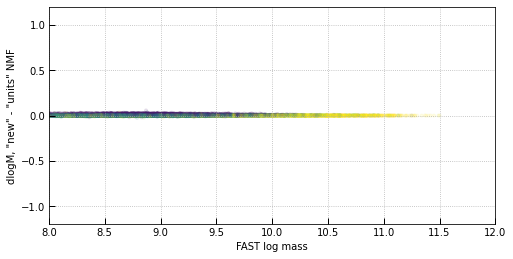

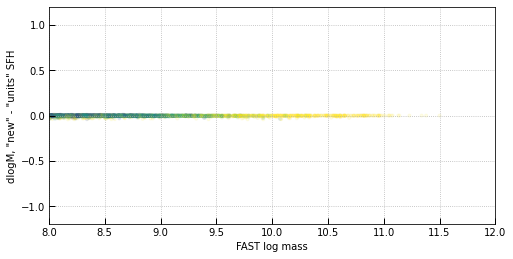

In [20]:
for (new, units) in [(nmf_vnorm_new, nmf_units), (sfh_vnorm_new, sfh_units)]:
    fig, ax = plt.subplots(1,1,figsize=fs)
    
    ax.scatter(fout['lmass'][subset], np.log10(new['mass']/units['mass'])[subset],
               c=(tab['mass']/tab['Lv'])[subset], vmin=0, vmax=2, alpha=0.1)
    
    ax.set_xlim(8,12)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_xlabel('FAST log mass')
    label = new.meta['label'].split()[0]
    ax.set_ylabel(f'dlogM, "new" - "units" {label}')

## Are the template flux units correct?

If the unit assumptions are correct, the V-band luminosities should agree for all methods.  Again, for the `vnorm` algorithm, `Lv` comes from the rest-frame V flux inferred / interpolated from the photometry.  For the `units` algorithm, `Lv` comes from the tabulated template values and the unit conversions of the fit coefficients.  So, if the template flux densities, were incorrect, the two methods would disagree.

**All Lv do agree**, so the *light* scaling seems to be correct.

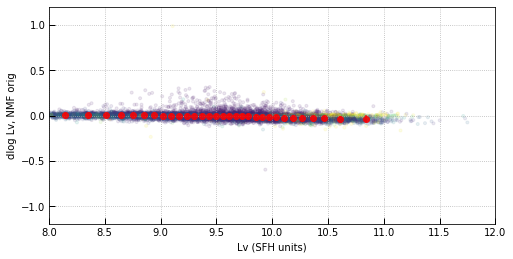

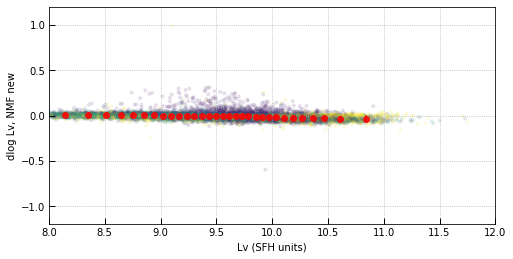

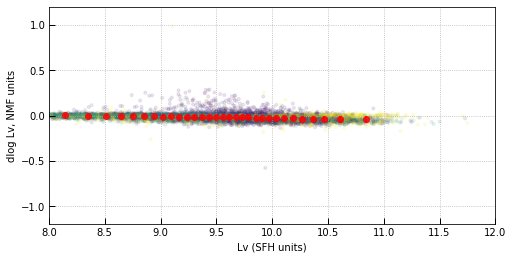

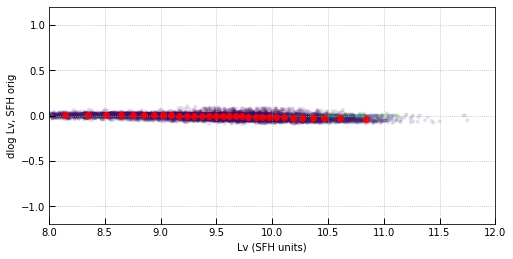

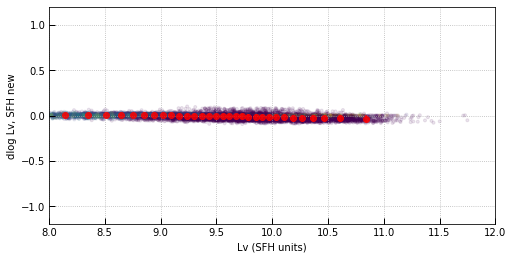

In [21]:
Lv_ref = sfh_units['Lv']
for tab in [nmf_vnorm_orig, nmf_vnorm_new, nmf_units, sfh_vnorm_orig, sfh_vnorm_new]:
    fig, ax = plt.subplots(1,1,figsize=fs)
    
    # Color-coding is M/Lv
    ax.scatter(np.log10(Lv_ref)[subset], np.log10(tab['Lv']/Lv_ref)[subset], 
               c=(tab['mass']/tab['Lv'])[subset], vmin=0, vmax=2, alpha=0.1)

    xm, ym, ys, yn = eazy.utils.running_median(np.log10(Lv_ref)[subset], np.log10(tab['Lv']/Lv_ref)[subset],
                                               NBIN=32)
    
    ax.errorbar(xm, ym, ys, marker='o', linestyle='None', color='r', alpha=0.8)
    
    ax.set_xlim(8,12)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_xlabel('Lv (SFH units)')
    ax.set_ylabel(f"dlog Lv, {tab.meta['label']}")

## standard_output wrapper function

The `PhotoZ.standard_output` function checks to see which template set is used and sets ``template_fnu_units=None, vnorm_type=1`` for the `fsps_QSF_12_v3` templates if those parameters aren't explicitly set by the user.

In [32]:
zout_nmf, _ = nmf.standard_output(zbest=fout['z'], extra_rf_filters=[], simple=True, 
                                  save_fits=False, absmag_filters=[])

zout_sfh, _ = sfh.standard_output(zbest=fout['z'], extra_rf_filters=[], simple=True, 
                                  save_fits=False, absmag_filters=[])

Get best fit coeffs & best redshifts
fit_best: 0.0 s (n_proc=1,  NOBJ=0)


/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)


fit_best: 9.8 s (n_proc=3,  NOBJ=30778)
Get parameters (UBVJ=[153, 154, 155, 161], simple=True)
Get best fit coeffs & best redshifts
fit_best: 0.0 s (n_proc=1,  NOBJ=0)


/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)
/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)
/Users/gbrammer/miniconda3/envs/grizli37/lib/python3.7/site-packages/eazy/photoz.py:5624: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)


fit_best: 11.1 s (n_proc=3,  NOBJ=30778)
Get parameters (UBVJ=[153, 154, 155, 161], simple=True)


In [34]:
zout_nmf.meta['label'] = 'NMF (auto)'
zout_sfh.meta['label'] = 'SFH (auto)'

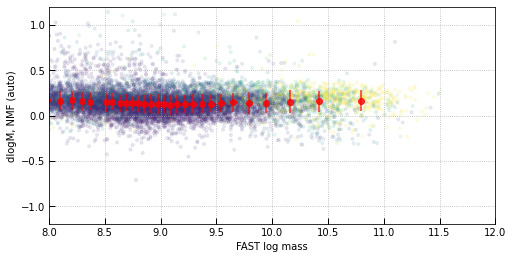

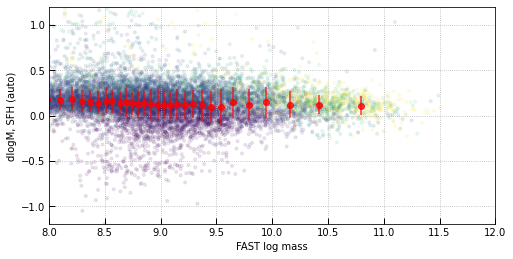

In [35]:
for tab in [zout_nmf, zout_sfh]:
    fig, ax = plt.subplots(1,1,figsize=fs)
    
    # Color-coding is M/Lv
    ax.scatter(fout['lmass'][subset], (np.log10(tab['mass']) - fout['lmass'])[subset], 
               c=(tab['mass']/tab['Lv'])[subset], vmin=0, vmax=2, alpha=0.1)
    
    xm, ym, ys, yn = eazy.utils.running_median(fout['lmass'][subset], 
                                               (np.log10(tab['mass']) - fout['lmass'])[subset],
                                               NBIN=32)
    
    ax.errorbar(xm, ym, ys, marker='o', linestyle='None', color='r', alpha=0.8)
    
    ax.set_xlim(8,12)
    ax.set_ylim(ylim)
    ax.grid()
    ax.set_xlabel('FAST log mass')
    ax.set_ylabel(f"dlogM, {tab.meta['label']}")
    

## SFRs

Compare `eazy` template SFRs to *empirical* Hershel-derived SFRs

In [22]:
her_file = glob.glob(f'{field}/*hersch*cat')[0]
print(her_file)
sfr = Table.read(her_file, format='ascii.commented_header')

sfr_file = glob.glob(f'{field}/*sfr*cat')[0]
#sfr_file = glob.glob(f'{field}/*sfr*cat')[0]
print(sfr_file)
mips = Table.read(sfr_file, format='ascii.commented_header')
print(len(mips), nmf.NOBJ)


cdfs/cdfs.v1.6.9.herschel.v0.4.cat
cdfs/cdfs.v1.6.9.sfr.v0.4.cat
30911 30911


In [23]:
nmf_ir = nmf.observed_frame_fluxes(f_numbers=[325, 329, 330])
sfh_ir = sfh.observed_frame_fluxes(f_numbers=[325, 329, 330])

Observed-frame f_numbers: [325, 329, 330]


100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Observed-frame f_numbers: [325, 329, 330]


100%|██████████| 17/17 [00:21<00:00,  1.28s/it]


In [24]:
nmf_ir.meta['label'] = 'NMF orig'
nmf_ir['Av'] = nmf_vnorm_orig['Av']
nmf_ir['sfr'] = nmf_vnorm_orig['sfr']

import copy
nmf_ir_units = copy.deepcopy(nmf_ir)
nmf_ir_units['sfr'] = nmf_units['sfr']
nmf_ir_units.meta['label'] = 'NMF units'

sfh_ir.meta['label'] = 'SFH units'
sfh_ir['Av'] = sfh_units['Av']
sfh_ir['sfr'] = sfh_units['sfr']

In [25]:
print(', '.join(nmf_ir.colnames))
print(', '.join(sfr.colnames))
print(', '.join(mips.colnames))

nmf_ir.meta

obs325, obs325_p, obs329, obs329_p, obs330, obs330_p, Av, sfr
id, z_peak, f24, e24, f100, e100, f160, e160, LIR, L2800, SFR_UVIR
id, z_peak, f24, e24, LIR24, L2800, SFR_UVIR, elo_SFR, ehi_SFR


OrderedDict([('name325', 'mips/24 lambda_c= 2.37589e+05'),
             ('pivw325', 237210.81338084748),
             ('name329', 'herschel/pacs/100 lambda_c= 1.02007e+06'),
             ('pivw329', 1019465.2633188266),
             ('name330', 'herschel/pacs/160 lambda_c= 1.65356e+06'),
             ('pivw330', 1652271.6919437002),
             ('label', 'NMF orig')])

### Inferred observed-frame MIR/FIR fluxes

Compare inferred observed-frame MIPS and PACS fluxes to ZFOURGE catalog.  These don't depend on the normalization methods as above but are rather taken directly from the best-fit template.

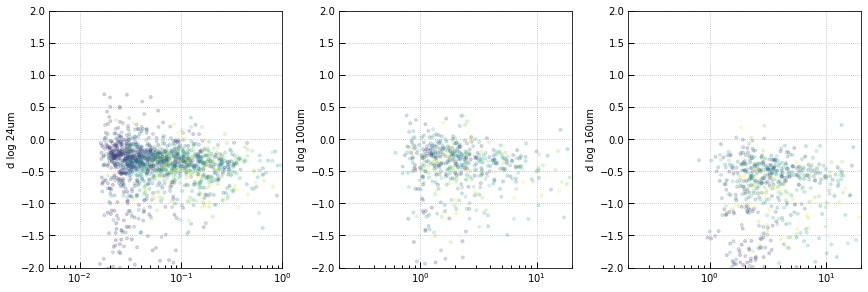

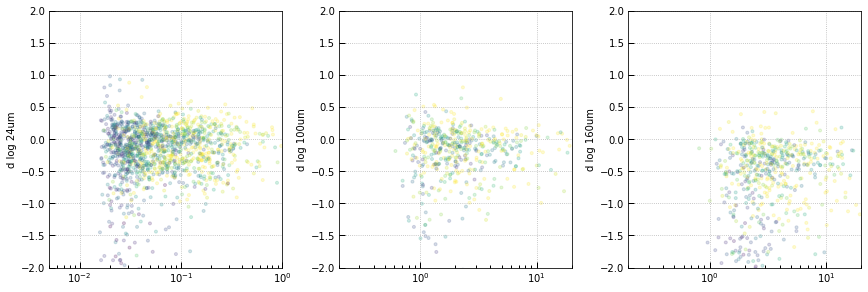

In [26]:
to_mJy = 10**(-0.4*(nmf.param['PRIOR_ABZP']-23.9))/1000.

min_sn = 5

for tab in [nmf_ir, sfh_ir]:
    
    fig, axes = plt.subplots(1,3,figsize=(12,4))
    
    sx = (sfr['f24']/sfr['e24'] > min_sn)
    axes[0].scatter(sfr['f24'][subset & sx], np.log10(tab['obs325']*to_mJy/sfr['f24'])[subset & sx], 
                    c=tab['Av'][subset & sx], vmin=0, vmax=2, alpha=0.2)
    
    axes[0].set_ylabel('d log 24um')
    axes[0].set_xlim(0.005, 1)
    
    sx = (sfr['f100']/sfr['e100'] > min_sn)
    axes[1].scatter(sfr['f100'][subset & sx], np.log10(tab['obs329']*to_mJy/sfr['f100'])[subset & sx], 
                    c=tab['Av'][subset & sx], vmin=0, vmax=2, alpha=0.2)
    
    axes[1].set_ylabel('d log 100um')
    axes[1].set_xlim(0.2, 20)
    
    sx = (sfr['f160']/sfr['e160'] > min_sn)
    axes[2].scatter(sfr['f160'][subset & sx], np.log10(tab['obs329']*to_mJy/sfr['f160'])[subset & sx], 
                    c=tab['Av'][subset & sx], vmin=0, vmax=2, alpha=0.2)
    
    axes[2].set_ylabel('d log 160um')
    axes[2].set_xlim(0.2, 20)

    for ax in axes:
        ax.semilogx()
        ax.set_ylim(-2,2)
        ax.grid()
        
    
    fig.tight_layout(pad=0.5)
    

### SFR , eazy vs. UV+IR

Like the stellar masses, the SFRs do, however, depend on the normalization method

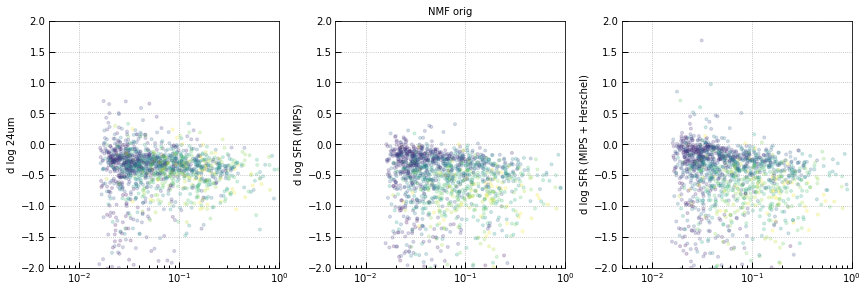

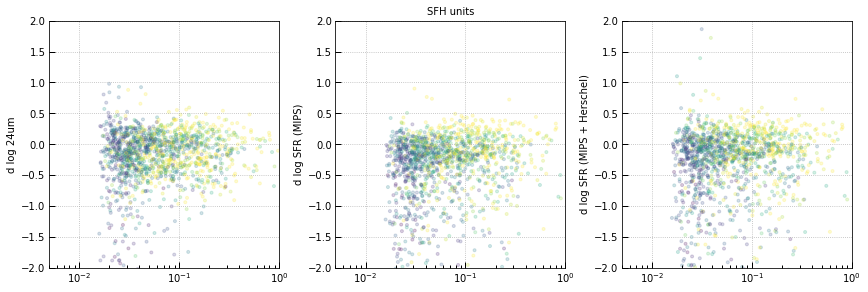

In [27]:
for tab in [nmf_ir, sfh_ir]:
    
    fig, axes = plt.subplots(1,3,figsize=(12,4))
    
    sx = (sfr['f24']/sfr['e24'] > min_sn)

    axes[0].scatter(mips['f24'][subset & sx], np.log10(tab['obs325']*to_mJy/mips['f24'])[subset & sx], 
                    c=tab['Av'][subset & sx], vmin=0, vmax=2, alpha=0.2)
    
    axes[0].set_ylabel('d log 24um')

    axes[1].scatter(mips['f24'][subset & sx], np.log10(tab['sfr']/mips['SFR_UVIR'])[subset & sx], 
                    c=tab['Av'][subset & sx], vmin=0, vmax=2, alpha=0.2)
    
    axes[1].set_ylabel('d log SFR (MIPS)')
    axes[1].set_title(tab.meta['label'])
    
    axes[2].scatter(sfr['f24'][subset & sx], np.log10(tab['sfr']/sfr['SFR_UVIR'])[subset & sx], 
                    c=tab['Av'][subset & sx], vmin=0, vmax=2, alpha=0.2)
    
    axes[2].set_ylabel('d log SFR (MIPS + Herschel)')
    
    for ax in axes:
        ax.semilogx()
        ax.set_xlim(0.005, 1)
        ax.set_ylim(-2,2)
        ax.grid()
        
    
    fig.tight_layout(pad=0.5)
    

# Conclusions

I'm pretty stumped by the way the `NMF/orig` and `SFH/units` template/fitting combinations give similar results that both agree reasonably well with outputs from FAST, given that the former is fully incorrect as far as I can tell.  There is not really any freedom to manipulate the columns in the parameter `tab` table such that `NMF/units` will agree with `SFH/units`, since the `Lv` column there already suggests that the normalizations are correct.  While it seems possible that the `NMF/orig` fit has two errors that cancel out to agree with the conceptually correct algorithm in `NMF/units` and `SFH/units`, I suspect that there's rather some fault in my analysis somewhere and indeed the `NMF/orig` results are usable.

**It is not clear that stellar masses computed with the NMF templates prior to Aug 2020 are incorrect.**  They agree well with both FAST and the newer `SFH/units` templates.  

However, the `NMF/new` and `NMF/units` combinations should **not** be used as these do show large systematic problems.  The `standard_output` method for computing the SPS parameters has been updated as of [eazy-0.4.dev130](https://github.com/gbrammer/eazy-py/commit/8fdfcce528d2b3929b899869e187b359f5802c25) to force `NMF/orig` if those those templates are used.

